In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [112]:
df=pd.read_csv("Customer_Data.csv")

In [93]:
df.head()

,Cust_ID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<h3>A check for missing data</h3>

In [94]:
df.isnull().sum()

Cust_ID                   0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [95]:
df.describe()


,Cust_ID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<h3>Remove unnecessary columns</h3>

In [98]:
df.drop(labels='Cust_ID',axis=1,inplace=True)

In [99]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [100]:
 #for simplicity
df.rename(columns={'Annual Income (k$)':'Annual Income'},inplace=True) 
df.rename(columns={'Spending Score (1-100)':'Spending Score'},inplace=True)
df.columns


Index(['Gender', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

<h3>Relation between Features</h3>

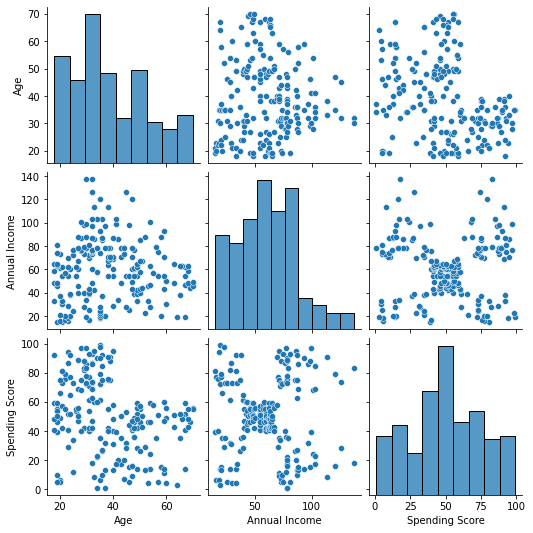

In [101]:
#Pair by pair analysis of features
sns.pairplot(df)

<h3>Plot of features to be used for clustering</h3>

<AxesSubplot:xlabel='Annual Income', ylabel='Spending Score'>

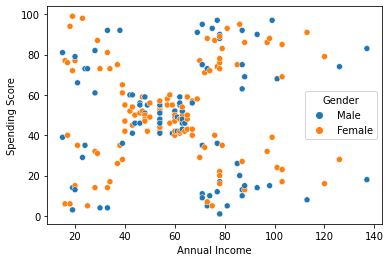

In [102]:
sns.scatterplot(data=df,x='Annual Income', y='Spending Score', hue='Gender')

In [103]:
X=df.iloc[:,[2,3]]

<h2>Applying K-Means </h2>

In [104]:
from sklearn.cluster import KMeans

<h3>Determining Number of Clusters</h3>

In [105]:
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,init='k-means++',random_state=42)
    model.fit(X)
    wcss.append(model.inertia_)

Text(0.5, 1.0, 'Elbow Method')

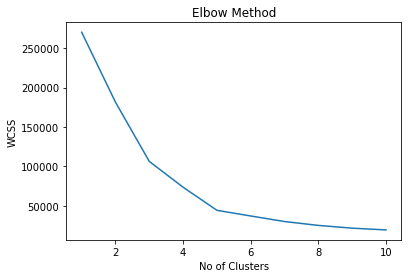

In [106]:
plt.plot(range(1,11),wcss)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

<h3>Feature Scaling</h3>

In [107]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

<h3>Building the Model</h3>

In [108]:
final_model=KMeans(n_clusters=5,init='k-means++',random_state=42)
y=final_model.fit_predict(X)

<h2>Visualization of the Result</h2>

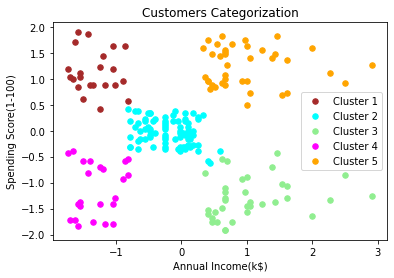

In [109]:
plt.scatter(X[y == 0,0], X[y == 0, 1], s = 30, c = 'brown', label = 'Cluster 1')
plt.scatter(X[y == 1,0], X[y == 1, 1], s = 30, c = 'cyan', label = 'Cluster 2')
plt.scatter(X[y == 2,0], X[y == 2, 1], s = 30, c = 'lightgreen', label = 'Cluster 3')
plt.scatter(X[y == 3,0], X[y == 3, 1], s = 30, c = 'magenta', label = 'Cluster 4')
plt.scatter(X[y == 4,0], X[y == 4, 1], s = 30, c = 'orange', label = 'Cluster 5')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.title('Customers Categorization')
plt.legend()
plt.show()